## I. Introduction

## II. Library Import

In [1]:
# Define Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import phik
import pickle

import warnings
warnings.filterwarnings('ignore')

# For EDA
from statistics import mode

# For Feature Selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# For Data Balancing
from imblearn.under_sampling import NearMiss, RandomUnderSampler 

# For Feature Encoding
from sklearn.preprocessing import OneHotEncoder

# Handling Outlier
from feature_engine.outliers import Winsorizer

# For Feature Scaling
from sklearn.preprocessing import MinMaxScaler

# For Principal Component Analysis
from sklearn.decomposition import PCA

# For Models
from sklearn.ensemble import RandomForestClassifier

# Calculate the Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Split between Train-Set and Test-Set
from sklearn.model_selection import train_test_split

# To Evaluate and Improve Models
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline

## III. Data Loading

In [2]:
# Loading the csv file using pd.read.
df = pd.read_csv('loan.csv')
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


## IV. Exploratory Data Analysis

In [3]:
# Identifying types of data for each column in our dataset.
df.dtypes

id                    int64
member_id             int64
loan_amnt           float64
funded_amnt         float64
funded_amnt_inv     float64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 74, dtype: object

### a. Dataset Summary

### b. Not-a-Number (NaN) Handling

In [15]:
# Finding NaNs (Not a Number) / Nulls (Zeros) in our data.
df.isnull().sum().sort_values(ascending=False).head(45)

dti_joint                      886870
annual_inc_joint               886868
verification_status_joint      886868
il_util                        868762
mths_since_rcnt_il             866569
open_acc_6m                    866007
open_il_6m                     866007
open_il_12m                    866007
open_il_24m                    866007
total_bal_il                   866007
inq_last_12m                   866007
open_rv_12m                    866007
open_rv_24m                    866007
max_bal_bc                     866007
all_util                       866007
inq_fi                         866007
total_cu_tl                    866007
desc                           761351
mths_since_last_record         750326
mths_since_last_major_derog    665676
mths_since_last_delinq         454312
next_pymnt_d                   252971
tot_coll_amt                    70276
tot_cur_bal                     70276
total_rev_hi_lim                70276
emp_title                       51462
emp_length  

In [4]:
# Detecting other forms of anomalies in our dataset.
anomalous_entries = {}

for x in list(df.columns):
    anomalous_entries[x] = 0
    for y in df[x]:
        if y in ['NaN', 'N/A', '--', '-', 'Null', '?', ' ']: # These are the specific NaN values we will be sweeping for.
            anomalous_entries[x] = anomalous_entries[x] + 1

anomalous_entries

{'id': 0,
 'member_id': 0,
 'loan_amnt': 0,
 'funded_amnt': 0,
 'funded_amnt_inv': 0,
 'term': 0,
 'int_rate': 0,
 'installment': 0,
 'grade': 0,
 'sub_grade': 0,
 'emp_title': 0,
 'emp_length': 0,
 'home_ownership': 0,
 'annual_inc': 0,
 'verification_status': 0,
 'issue_d': 0,
 'loan_status': 0,
 'pymnt_plan': 0,
 'url': 0,
 'desc': 246,
 'purpose': 0,
 'title': 0,
 'zip_code': 0,
 'addr_state': 0,
 'dti': 0,
 'delinq_2yrs': 0,
 'earliest_cr_line': 0,
 'inq_last_6mths': 0,
 'mths_since_last_delinq': 0,
 'mths_since_last_record': 0,
 'open_acc': 0,
 'pub_rec': 0,
 'revol_bal': 0,
 'revol_util': 0,
 'total_acc': 0,
 'initial_list_status': 0,
 'out_prncp': 0,
 'out_prncp_inv': 0,
 'total_pymnt': 0,
 'total_pymnt_inv': 0,
 'total_rec_prncp': 0,
 'total_rec_int': 0,
 'total_rec_late_fee': 0,
 'recoveries': 0,
 'collection_recovery_fee': 0,
 'last_pymnt_d': 0,
 'last_pymnt_amnt': 0,
 'next_pymnt_d': 0,
 'last_credit_pull_d': 0,
 'collections_12_mths_ex_med': 0,
 'mths_since_last_major_dero

In [5]:
df['emp_length']

0         10+ years
1          < 1 year
2         10+ years
3         10+ years
4            1 year
            ...    
887374      8 years
887375    10+ years
887376      5 years
887377       1 year
887378    10+ years
Name: emp_length, Length: 887379, dtype: object

In [20]:
df['desc']

0           Borrower added on 12/22/11 > I need to upgra...
1           Borrower added on 12/22/11 > I plan to use t...
2                                                       NaN
3           Borrower added on 12/21/11 > to pay for prop...
4           Borrower added on 12/21/11 > I plan on combi...
                                ...                        
887374                                                  NaN
887375                                                  NaN
887376                                                  NaN
887377                                                  NaN
887378                                                  NaN
Name: desc, Length: 887379, dtype: object

In [22]:
df['title'].sort_values()

218986           \tcredit_card
220035           \tcredit_card
3765      \tdebt_consolidation
218172    \tdebt_consolidation
3324      \tdebt_consolidation
                  ...         
473064                     NaN
473073                     NaN
474217                     NaN
475119                     NaN
475450                     NaN
Name: title, Length: 887379, dtype: object

In [26]:
df['delinq_2yrs'].sort_values(ascending=False)

783008    39.0
524079    30.0
136194    29.0
735685    27.0
670113    26.0
          ... 
42530      NaN
42531      NaN
42532      NaN
42533      NaN
42534      NaN
Name: delinq_2yrs, Length: 887379, dtype: float64

In [28]:
df['earliest_cr_line'].sort_values()

538829    Apr-1955
123026    Apr-1955
839958    Apr-1958
577414    Apr-1960
423675    Apr-1961
            ...   
42530          NaN
42531          NaN
42532          NaN
42533          NaN
42534          NaN
Name: earliest_cr_line, Length: 887379, dtype: object

In [30]:
df['inq_last_6mths'].sort_values(ascending=False)

41657    33.0
41848    32.0
42223    31.0
42234    28.0
42241    27.0
         ... 
42530     NaN
42531     NaN
42532     NaN
42533     NaN
42534     NaN
Name: inq_last_6mths, Length: 887379, dtype: float64

In [31]:
df['mths_since_last_delinq'].sort_values(ascending=False)

394904    188.0
392664    180.0
809435    176.0
639674    171.0
624963    170.0
          ...  
887369      NaN
887373      NaN
887374      NaN
887376      NaN
887378      NaN
Name: mths_since_last_delinq, Length: 887379, dtype: float64

In [32]:
df['mths_since_last_record'].sort_values(ascending=False)

39283     129.0
462657    121.0
49210     121.0
483658    120.0
487013    120.0
          ...  
887371      NaN
887372      NaN
887373      NaN
887375      NaN
887377      NaN
Name: mths_since_last_record, Length: 887379, dtype: float64

In [33]:
df['open_acc'].sort_values(ascending=False)

886805    90.0
281009    84.0
629741    82.0
848357    79.0
349041    76.0
          ... 
42530      NaN
42531      NaN
42532      NaN
42533      NaN
42534      NaN
Name: open_acc, Length: 887379, dtype: float64

In [34]:
df['pub_rec'].sort_values(ascending=False)

534800    86.0
436160    63.0
132779    54.0
71717     49.0
782450    49.0
          ... 
42530      NaN
42531      NaN
42532      NaN
42533      NaN
42534      NaN
Name: pub_rec, Length: 887379, dtype: float64

In [38]:
df['revol_util'].sort_values(ascending=False)

406516    892.3
368206    366.6
671388    193.0
880908    184.6
574398    182.8
          ...  
883031      NaN
883102      NaN
883171      NaN
884401      NaN
887229      NaN
Name: revol_util, Length: 887379, dtype: float64

In [39]:
df['total_acc'].sort_values(ascending=False)

619143    169.0
863500    162.0
250307    156.0
579417    151.0
239772    150.0
          ...  
42530       NaN
42531       NaN
42532       NaN
42533       NaN
42534       NaN
Name: total_acc, Length: 887379, dtype: float64

In [40]:
df['last_pymnt_d'].sort_values(ascending=False)

727378    Sep-2015
367274    Sep-2015
424380    Sep-2015
179706    Sep-2015
424361    Sep-2015
            ...   
883832         NaN
884500         NaN
885587         NaN
886627         NaN
886937         NaN
Name: last_pymnt_d, Length: 887379, dtype: object

In [41]:
df['next_pymnt_d'].sort_values(ascending=False)

40196     Sep-2015
40218     Sep-2015
40309     Sep-2015
40264     Sep-2015
40243     Sep-2015
            ...   
887351         NaN
887364         NaN
887366         NaN
887369         NaN
887371         NaN
Name: next_pymnt_d, Length: 887379, dtype: object

In [42]:
df['last_credit_pull_d'].sort_values(ascending=False)

49653     Sep-2015
299448    Sep-2015
121620    Sep-2015
121622    Sep-2015
322898    Sep-2015
            ...   
563415         NaN
820268         NaN
848683         NaN
853529         NaN
886074         NaN
Name: last_credit_pull_d, Length: 887379, dtype: object

In [43]:
df['collections_12_mths_ex_med'].sort_values(ascending=False)

310694    20.0
282891    16.0
823966    14.0
711674    10.0
544412     7.0
          ... 
42530      NaN
42531      NaN
42532      NaN
42533      NaN
42534      NaN
Name: collections_12_mths_ex_med, Length: 887379, dtype: float64

In [44]:
df['mths_since_last_major_derog'].sort_values(ascending=False)

394904    188.0
392664    180.0
809435    176.0
639674    171.0
816903    170.0
          ...  
887371      NaN
887373      NaN
887374      NaN
887376      NaN
887378      NaN
Name: mths_since_last_major_derog, Length: 887379, dtype: float64

In [52]:
df['policy_code'].sort_values(ascending=False)

0         1.0
591590    1.0
591579    1.0
591580    1.0
591581    1.0
         ... 
295796    1.0
295797    1.0
295798    1.0
295799    1.0
887378    1.0
Name: policy_code, Length: 887379, dtype: float64

In [49]:
df.loc[df['policy_code']!= 1.0]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m


In [55]:
df['annual_inc_joint'].sort_values(ascending=False)

484827    500000.0
469336    425000.0
561504    410000.0
549955    375000.0
470116    340000.0
            ...   
887374         NaN
887375         NaN
887376         NaN
887377         NaN
887378         NaN
Name: annual_inc_joint, Length: 887379, dtype: float64

In [58]:
df['dti_joint'].sort_values(ascending=False)

499293    43.86
475203    39.50
493539    39.30
484472    38.19
479924    37.81
          ...  
887374      NaN
887375      NaN
887376      NaN
887377      NaN
887378      NaN
Name: dti_joint, Length: 887379, dtype: float64

In [62]:
df['verification_status_joint'].sort_values(ascending=False)

530914    Verified
487235    Verified
486082    Verified
486168    Verified
486212    Verified
            ...   
887374         NaN
887375         NaN
887376         NaN
887377         NaN
887378         NaN
Name: verification_status_joint, Length: 887379, dtype: object

In [66]:
df['acc_now_delinq'].sort_values(ascending=False)

823966    14.0
744994     6.0
641008     5.0
121844     5.0
81058      5.0
          ... 
42530      NaN
42531      NaN
42532      NaN
42533      NaN
42534      NaN
Name: acc_now_delinq, Length: 887379, dtype: float64

In [69]:
df['tot_coll_amt'].sort_values(ascending=False)

416962    9152545.0
842625     496651.0
603604     380757.0
267841     296368.0
595163     262740.0
            ...    
230652          NaN
230653          NaN
230654          NaN
230655          NaN
230656          NaN
Name: tot_coll_amt, Length: 887379, dtype: float64

In [72]:
df['tot_cur_bal'].sort_values(ascending=False)

180080    8000078.0
177927    4772549.0
755746    4447397.0
629047    4127799.0
234444    4026405.0
            ...    
230652          NaN
230653          NaN
230654          NaN
230655          NaN
230656          NaN
Name: tot_cur_bal, Length: 887379, dtype: float64

In [75]:
df['open_acc_6m'].sort_values(ascending=False)

470184    14.0
475231    14.0
473513    12.0
481004    12.0
475258    10.0
          ... 
887374     NaN
887375     NaN
887376     NaN
887377     NaN
887378     NaN
Name: open_acc_6m, Length: 887379, dtype: float64

In [78]:
df['open_il_6m'].sort_values(ascending=False)

488854    40.0
474474    34.0
475544    33.0
473846    33.0
474349    32.0
          ... 
887374     NaN
887375     NaN
887376     NaN
887377     NaN
887378     NaN
Name: open_il_6m, Length: 887379, dtype: float64

In [81]:
df['open_il_12m'].sort_values(ascending=False)

484800    12.0
475231    10.0
478757    10.0
478510     9.0
467953     9.0
          ... 
887374     NaN
887375     NaN
887376     NaN
887377     NaN
887378     NaN
Name: open_il_12m, Length: 887379, dtype: float64

In [84]:
df['open_il_24m'].sort_values(ascending=False)

467953    19.0
484341    15.0
484800    15.0
480175    14.0
474062    14.0
          ... 
887374     NaN
887375     NaN
887376     NaN
887377     NaN
887378     NaN
Name: open_il_24m, Length: 887379, dtype: float64

In [87]:
df['mths_since_rcnt_il'].sort_values(ascending=False)

478034    363.0
466293    338.0
474400    300.0
468095    288.0
466542    275.0
          ...  
887374      NaN
887375      NaN
887376      NaN
887377      NaN
887378      NaN
Name: mths_since_rcnt_il, Length: 887379, dtype: float64

In [90]:
df['total_bal_il'].sort_values(ascending=False)

468333    878459.0
475544    634217.0
469303    561918.0
476119    554184.0
470766    480133.0
            ...   
887374         NaN
887375         NaN
887376         NaN
887377         NaN
887378         NaN
Name: total_bal_il, Length: 887379, dtype: float64

In [95]:
df['il_util'].sort_values(ascending=False)

487450    223.3
471845    209.9
485828    200.0
478489    191.8
480313    179.2
          ...  
887374      NaN
887375      NaN
887376      NaN
887377      NaN
887378      NaN
Name: il_util, Length: 887379, dtype: float64

In [98]:
df['open_rv_12m'].sort_values(ascending=False)

473513    22.0
481948    19.0
468732    16.0
469085    15.0
475258    15.0
          ... 
887374     NaN
887375     NaN
887376     NaN
887377     NaN
887378     NaN
Name: open_rv_12m, Length: 887379, dtype: float64

In [101]:
df['open_rv_24m'].sort_values(ascending=False)

473513    43.0
475258    30.0
468679    29.0
468732    27.0
487437    24.0
          ... 
887374     NaN
887375     NaN
887376     NaN
887377     NaN
887378     NaN
Name: open_rv_24m, Length: 887379, dtype: float64

In [104]:
df['max_bal_bc'].sort_values(ascending=False)

473760    127305.0
466705    100973.0
473629     83047.0
470054     64490.0
473686     64245.0
            ...   
887374         NaN
887375         NaN
887376         NaN
887377         NaN
887378         NaN
Name: max_bal_bc, Length: 887379, dtype: float64

In [107]:
df['all_util'].sort_values(ascending=False)

482352    151.4
481158    146.4
475544    141.0
483843    140.0
487450    138.1
          ...  
887374      NaN
887375      NaN
887376      NaN
887377      NaN
887378      NaN
Name: all_util, Length: 887379, dtype: float64

In [110]:
df['total_rev_hi_lim'].sort_values(ascending=False)

301370    9999999.0
129958    9999999.0
755746    9999999.0
178261    2013133.0
60570     1998700.0
            ...    
230652          NaN
230653          NaN
230654          NaN
230655          NaN
230656          NaN
Name: total_rev_hi_lim, Length: 887379, dtype: float64

In [113]:
df['inq_fi'].sort_values(ascending=False)

468466    17.0
466687    16.0
488375    15.0
482741    14.0
471642    14.0
          ... 
887374     NaN
887375     NaN
887376     NaN
887377     NaN
887378     NaN
Name: inq_fi, Length: 887379, dtype: float64

In [118]:
df['total_cu_tl'].sort_values(ascending=False)

476429    35.0
475581    33.0
477385    32.0
475483    30.0
474623    29.0
          ... 
887374     NaN
887375     NaN
887376     NaN
887377     NaN
887378     NaN
Name: total_cu_tl, Length: 887379, dtype: float64

In [121]:
df['inq_last_12m'].sort_values(ascending=False)

484240    32.0
469905    30.0
467386    26.0
473475    25.0
478223    25.0
          ... 
887374     NaN
887375     NaN
887376     NaN
887377     NaN
887378     NaN
Name: inq_last_12m, Length: 887379, dtype: float64

### Other Columns

In [123]:
# Finding NaNs (Not a Number) / Nulls (Zeros) in our data.
df.isnull().sum().sort_values(ascending=False).tail(35)

annual_inc                 4
collection_recovery_fee    0
application_type           0
policy_code                0
last_pymnt_amnt            0
id                         0
recoveries                 0
pymnt_plan                 0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
verification_status        0
issue_d                    0
loan_status                0
url                        0
total_rec_late_fee         0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
revol_bal                  0
initial_list_status        0
out_prncp                  0
member_id                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
out_prncp_inv 

In [124]:
df_nn = df[['collection_recovery_fee', 'application_type', 'policy_code', 'last_pymnt_amnt', 'id', 'recoveries', 'pymnt_plan', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'url', 'total_rec_late_fee', 'purpose', 'zip_code',
'addr_state', 'dti', 'revol_bal', 'initial_list_status', 'out_prncp', 'member_id', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'out_prncp_inv']]

In [126]:
df_nn.describe()

,collection_recovery_fee,policy_code,last_pymnt_amnt,id,recoveries,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,total_rec_late_fee,dti,revol_bal,out_prncp,member_id,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,out_prncp_inv
count,887379.000000,887379.0,887379.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873790e+05,887379.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000
mean,4.880757,1.0,2164.145585,3.246513e+07,45.919243,14755.264605,14741.877625,14702.464383,13.246740,436.717127,0.396692,18.157039,1.692079e+04,8403.124852,3.500182e+07,7558.826684,7521.160306,5757.706424,1754.804327,8399.713242
std,63.125281,0.0,4794.783233,2.282734e+07,409.693874,8435.455601,8429.897657,8442.106732,4.381867,244.186593,4.087825,17.190626,2.242679e+04,8493.450269,2.411335e+07,7871.243336,7846.108604,6625.441046,2095.356099,8489.997617
min,0.000000,1.0,0.000000,5.473400e+04,0.000000,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000,0.000000,0.000000e+00,0.000000,7.047300e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.0,280.170000,9.206643e+06,0.000000,8000.000000,8000.000000,8000.000000,9.990000,260.705000,0.000000,11.910000,6.443000e+03,0.000000,1.087713e+07,1914.590000,1899.700000,1200.570000,441.460000,0.000000
50%,0.000000,1.0,462.780000,3.443327e+07,0.000000,13000.000000,13000.000000,13000.000000,12.990000,382.550000,0.000000,17.650000,1.187500e+04,6458.290000,3.709528e+07,4894.999117,4862.010000,3215.320000,1073.280000,6455.810000
75%,0.000000,1.0,831.245000,5.490814e+07,0.000000,20000.000000,20000.000000,20000.000000,16.200000,572.600000,0.000000,23.950000,2.082900e+04,13659.055000,5.847135e+07,10616.814231,10565.690000,8000.000000,2238.265000,13654.050000
max,7002.190000,1.0,36475.590000,6.861706e+07,33520.270000,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,358.680000,9999.000000,2.904836e+06,49372.860000,7.354484e+07,57777.579870,57777.580000,35000.030000,24205.620000,49372.860000


In [128]:
df_nn['collection_recovery_fee'].sort_values(ascending=False)

22943     7002.1900
32900     6972.5900
37083     6543.0400
32899     5774.8000
48305     5694.0936
            ...    
307016       0.0000
307017       0.0000
307018       0.0000
307019       0.0000
887378       0.0000
Name: collection_recovery_fee, Length: 887379, dtype: float64

In [129]:
df_nn['application_type'].sort_values(ascending=False)

492272         JOINT
473112         JOINT
541380         JOINT
475798         JOINT
494504         JOINT
             ...    
295796    INDIVIDUAL
295797    INDIVIDUAL
295798    INDIVIDUAL
295799    INDIVIDUAL
887378    INDIVIDUAL
Name: application_type, Length: 887379, dtype: object

In [130]:
df_nn['policy_code'].sort_values(ascending=False)

0         1.0
591590    1.0
591579    1.0
591580    1.0
591581    1.0
         ... 
295796    1.0
295797    1.0
295798    1.0
295799    1.0
887378    1.0
Name: policy_code, Length: 887379, dtype: float64

In [133]:
df_nn['last_pymnt_amnt'].sort_values(ascending=False)

815014    36475.59
783622    36347.05
674122    36257.59
237015    36234.44
588764    36224.17
            ...   
474740        0.00
474739        0.00
474738        0.00
474737        0.00
482796        0.00
Name: last_pymnt_amnt, Length: 887379, dtype: float64

In [134]:
df_nn['id'].sort_values(ascending=False)

466305    68617057
466388    68617034
466454    68616919
466462    68616891
466303    68616873
            ...   
516885       56705
41654        56413
38739        55742
41534        55521
35836        54734
Name: id, Length: 887379, dtype: int64

In [135]:
df_nn['recoveries'].sort_values(ascending=False)

202939    33520.27
48305     31900.52
3668      29623.35
215225    29282.07
42191     27750.00
            ...   
307790        0.00
307791        0.00
307792        0.00
307793        0.00
887378        0.00
Name: recoveries, Length: 887379, dtype: float64

In [136]:
df_nn['pymnt_plan'].sort_values(ascending=False)

209010    y
25684     y
254214    y
176278    y
332312    y
         ..
295800    n
295801    n
295802    n
295803    n
887378    n
Name: pymnt_plan, Length: 887379, dtype: object

In [138]:
df_nn['loan_amnt'].sort_values(ascending=False)

758099    35000.0
814939    35000.0
358962    35000.0
358967    35000.0
434254    35000.0
           ...   
42136       500.0
41824       500.0
41704       500.0
39442       500.0
38932       500.0
Name: loan_amnt, Length: 887379, dtype: float64

In [139]:
df_nn['funded_amnt'].sort_values(ascending=False)

449958    35000.0
748622    35000.0
459778    35000.0
459791    35000.0
459824    35000.0
           ...   
42320       500.0
41824       500.0
41704       500.0
42362       500.0
42417       500.0
Name: funded_amnt, Length: 887379, dtype: float64

In [140]:
df_nn['funded_amnt_inv'].sort_values(ascending=False)

485846    35000.0
806707    35000.0
476620    35000.0
657919    35000.0
300451    35000.0
           ...   
38667         0.0
38672         0.0
38800         0.0
38673         0.0
38475         0.0
Name: funded_amnt_inv, Length: 887379, dtype: float64

In [141]:
df_nn['term'].sort_values(ascending=False)

443689     60 months
295292     60 months
295305     60 months
668290     60 months
295299     60 months
             ...    
336528     36 months
336529     36 months
336531     36 months
336532     36 months
887378     36 months
Name: term, Length: 887379, dtype: object

In [142]:
df_nn['int_rate'].sort_values(ascending=False)

704939    28.99
618750    28.99
536189    28.99
544292    28.99
561463    28.99
          ...  
733901     5.32
579707     5.32
487396     5.32
733911     5.32
710649     5.32
Name: int_rate, Length: 887379, dtype: float64

In [143]:
df_nn['installment'].sort_values(ascending=False)

571358    1445.46
578649    1445.46
627085    1424.57
735822    1424.57
455343    1409.99
           ...   
42362       15.91
42417       15.76
41704       15.75
39613       15.69
41824       15.67
Name: installment, Length: 887379, dtype: float64

In [144]:
df_nn['grade'].sort_values(ascending=False)

28896     G
811406    G
732812    G
806860    G
419749    G
         ..
759443    A
217673    A
217672    A
447935    A
268572    A
Name: grade, Length: 887379, dtype: object

In [145]:
df_nn['sub_grade'].sort_values(ascending=False)

635106    G5
133609    G5
465120    G5
846367    G5
457456    G5
          ..
844855    A1
286088    A1
21872     A1
814473    A1
384202    A1
Name: sub_grade, Length: 887379, dtype: object

In [146]:
df_nn['home_ownership'].sort_values(ascending=False)

0             RENT
465434        RENT
465429        RENT
465428        RENT
465417        RENT
            ...   
501533    MORTGAGE
501534    MORTGAGE
669242         ANY
492723         ANY
311334         ANY
Name: home_ownership, Length: 887379, dtype: object

In [147]:
df_nn['verification_status'].sort_values(ascending=False)

0             Verified
440914        Verified
440907        Verified
440905        Verified
440902        Verified
              ...     
518552    Not Verified
106554    Not Verified
518545    Not Verified
106561    Not Verified
544196    Not Verified
Name: verification_status, Length: 887379, dtype: object

In [148]:
df_nn['issue_d'].sort_values(ascending=False)

632260    Sep-2015
608402    Sep-2015
608408    Sep-2015
608407    Sep-2015
608406    Sep-2015
            ...   
38890     Apr-2008
38891     Apr-2008
38892     Apr-2008
38893     Apr-2008
38839     Apr-2008
Name: issue_d, Length: 887379, dtype: object

In [149]:
df_nn['url'].sort_values(ascending=False)

4597    https://www.lendingclub.com/browse/loanDetail....
4596    https://www.lendingclub.com/browse/loanDetail....
4595    https://www.lendingclub.com/browse/loanDetail....
4476    https://www.lendingclub.com/browse/loanDetail....
4600    https://www.lendingclub.com/browse/loanDetail....
                              ...                        
4588    https://www.lendingclub.com/browse/loanDetail....
4560    https://www.lendingclub.com/browse/loanDetail....
4591    https://www.lendingclub.com/browse/loanDetail....
4592    https://www.lendingclub.com/browse/loanDetail....
4594    https://www.lendingclub.com/browse/loanDetail....
Name: url, Length: 887379, dtype: object

In [150]:
df_nn['total_rec_late_fee'].sort_values(ascending=False)

82926     358.680000
80186     294.680000
204892    286.747566
43186     268.550000
277295    252.800000
             ...    
300208      0.000000
300209      0.000000
300210      0.000000
300211      0.000000
887378      0.000000
Name: total_rec_late_fee, Length: 887379, dtype: float64

In [151]:
df_nn['purpose'].sort_values(ascending=False)

212295    wedding
19167     wedding
213400    wedding
31302     wedding
116338    wedding
           ...   
684844        car
486224        car
865485        car
684853        car
207697        car
Name: purpose, Length: 887379, dtype: object

In [152]:
df_nn['zip_code'].sort_values(ascending=False)

381418    999xx
239076    999xx
773848    999xx
830936    999xx
794836    999xx
          ...  
547445    008xx
342425    007xx
285814    007xx
29984     007xx
649644    007xx
Name: zip_code, Length: 887379, dtype: object

In [153]:
df_nn['addr_state'].sort_values(ascending=False)

546742    WY
363296    WY
448006    WY
604203    WY
363022    WY
          ..
546520    AK
546499    AK
120773    AK
120765    AK
831949    AK
Name: addr_state, Length: 887379, dtype: object

In [154]:
df_nn['dti'].sort_values(ascending=False)

484446    9999.00
531886    9999.00
475046    1092.52
540456     672.52
532701     380.53
           ...   
31526        0.00
247667       0.00
38270        0.00
15120        0.00
15556        0.00
Name: dti, Length: 887379, dtype: float64

In [155]:
df_nn['revol_bal'].sort_values(ascending=False)

755746    2904836.0
129958    2568995.0
301370    2560703.0
60570     1746716.0
178261    1743266.0
            ...    
48055           0.0
501831          0.0
392636          0.0
5392            0.0
849250          0.0
Name: revol_bal, Length: 887379, dtype: float64

In [156]:
df_nn['initial_list_status'].sort_values(ascending=False)

562607    w
293035    w
293033    w
293032    w
293031    w
         ..
294012    f
294014    f
294015    f
294017    f
887378    f
Name: initial_list_status, Length: 887379, dtype: object

In [157]:
df_nn['out_prncp'].sort_values(ascending=False)

518390    49372.86
522429    47406.94
587737    40374.86
471393    35000.00
478572    35000.00
            ...   
169204        0.00
169206        0.00
169207        0.00
169208        0.00
0             0.00
Name: out_prncp, Length: 887379, dtype: float64

In [158]:
df_nn['member_id'].sort_values(ascending=False)

466347    73544841
466397    73544827
466373    73542831
466305    73519894
466388    73519870
            ...   
42493        70694
42534        70681
42483        70651
42527        70626
42459        70473
Name: member_id, Length: 887379, dtype: int64

In [159]:
df_nn['total_pymnt'].sort_values(ascending=False)

207282    57777.579870
206795    57060.139914
7924      56809.051629
200041    56087.909922
194679    55982.649897
              ...     
468905        0.000000
468906        0.000000
468907        0.000000
468908        0.000000
478530        0.000000
Name: total_pymnt, Length: 887379, dtype: float64

In [160]:
df_nn['total_pymnt_inv'].sort_values(ascending=False)

207282    57777.58
206795    57019.38
7924      56475.05
200041    56047.85
194679    55982.65
            ...   
468919        0.00
468920        0.00
468921        0.00
476725        0.00
474529        0.00
Name: total_pymnt_inv, Length: 887379, dtype: float64

In [161]:
df_nn['total_rec_prncp'].sort_values(ascending=False)

19172     35000.03
10023     35000.02
19234     35000.02
19459     35000.02
19435     35000.02
            ...   
474689        0.00
474690        0.00
474691        0.00
474692        0.00
497980        0.00
Name: total_rec_prncp, Length: 887379, dtype: float64

In [162]:
df_nn['total_rec_int'].sort_values(ascending=False)

223608    24205.62
223060    23450.38
217974    23172.31
217842    23171.65
10639     23062.45
            ...   
470346        0.00
470347        0.00
478845        0.00
470348        0.00
468253        0.00
Name: total_rec_int, Length: 887379, dtype: float64

In [163]:
df_nn['out_prncp_inv'].sort_values(ascending=False)

518390    49372.86
522429    47406.94
587737    40374.86
474772    35000.00
476685    35000.00
            ...   
169191        0.00
169193        0.00
169195        0.00
169196        0.00
0             0.00
Name: out_prncp_inv, Length: 887379, dtype: float64

### c. Duplication Handling

### d. Class Balance

#### Original

Class Balance:  Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64


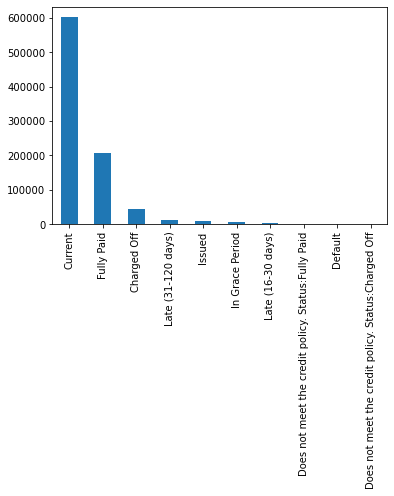

In [164]:
df['loan_status'].value_counts().plot(kind='bar')
print("Class Balance: ", df['loan_status'].value_counts())

#### New

In [ ]:
df1['loan_status'].value_counts().plot(kind='bar')
print("Class Balance: ", df1['loan_status'].value_counts())

#### Modified

## V. Data Preprocessing

### a. Feature Selection

### b. Splitting Dataset

In [ ]:
X = df1.drop(['hazardous'], axis=1) 
y = df1['hazardous']

# Splitting dataframe between Train Set and Test Set
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, train_size=0.7)

print('X_Train Size : ', X_train.shape)
print('X_Test Size  : ', X_test.shape)
print('y_Train Size : ', y_train.shape)
print('y_Test Size  : ', y_test.shape)

In [ ]:
X_ann = df1.drop(['hazardous'], axis=1) 
y_ann = df1['hazardous']

# Splitting dataframe between Train Set and Test Set
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, train_size=0.7)

print('X_Train Size : ', X_train.shape)
print('X_Test Size  : ', X_test.shape)
print('y_Train Size : ', y_train.shape)
print('y_Test Size  : ', y_test.shape)

### c. Dataset Balancing

### d. Outlier Handling

### e. Feature Scaling

### f. Feature Encoding

### g. Concat